<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# !apt-get -qq install python-cartopy python3-cartopy

In [26]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [27]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [28]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-10-28 13:42:03.168536


In [29]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [30]:
# All States
states = pop['State'].tolist()
states.sort()

In [31]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [32]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [33]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [34]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('US Deaths')
    print(us['deaths'].sum())
    print('')

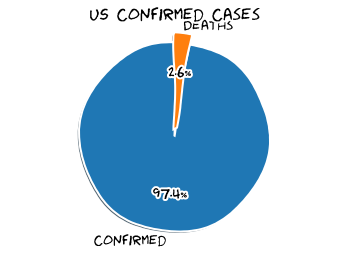

US Population
330362592
US Confirmed
8781354 (2.658095744690125% of population)
US Deaths
226482

New York City Confirmed
259710 (3.1152177143866777% of population)
New York City Deaths
23957

Philippines Confirmed
375180
Philippines Deaths
7114



In [35]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[(ny['admin2'] == 'Queens') | (ny['admin2'] == 'Kings') | (ny['admin2'] == 'New York') | (ny['admin2'] == 'Bronx') | (ny['admin2'] == 'Richmond')]
nyc_confirmed = nyc['confirmed'].sum()
nyc_deaths = nyc['deaths'].sum()
# from https://www.census.gov/quickfacts/newyorkcitynewyork
nyc_population = 8336817

nyc_confirmed_perc_of_pop = (nyc_confirmed/nyc_population) * 100
nyc_deaths_perc_of_confirmed = (nyc_deaths/nyc_confirmed) * 100

print('New York City Confirmed')
print('{0} ({1}% of population)'.format(nyc_confirmed, nyc_confirmed_perc_of_pop))
print('New York City Deaths')
print(nyc_deaths)
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

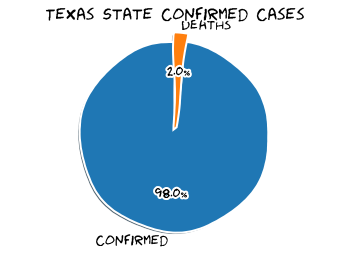

Texas State Total Population
28701845
Texas State Confirmed
904769 (3.1523025784579355% of population)
Texas State Deaths
18061 (1.9962001350620988% of confirmed)



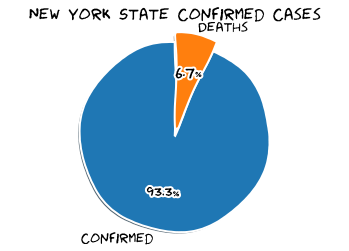

New York State Total Population
19542209
New York State Confirmed
498646 (2.551635795114053% of population)
New York State Deaths
33412 (6.700545076065986% of confirmed)



In [36]:
state_details('Texas')
state_details('New York')

In [37]:
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1603891487000,40.710881,-73.816847,76523,0,7293,69230,Queens,36081,"Queens, New York, US",3395.200585,None,None,84036081,USA
9,New York,US,1603891487000,40.636182,-73.949356,74903,0,7387,67516,Kings,36047,"Kings, New York, US",2926.009306,None,None,84036047,USA
15,New York,US,1603891487000,40.852093,-73.862828,55213,0,4987,50226,Bronx,36005,"Bronx, New York, US",3893.155231,None,None,84036005,USA
18,New York,US,1603891487000,40.740665,-73.589419,49496,0,2208,47288,Nassau,36059,"Nassau, New York, US",3647.661918,None,None,84036059,USA
19,New York,US,1603891487000,40.883201,-72.801217,48829,0,2019,46810,Suffolk,36103,"Suffolk, New York, US",3306.851343,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,New York,US,1603891487000,42.635055,-77.103699,121,0,7,114,Yates,36123,"Yates, New York, US",485.690202,None,None,84036123,USA
2772,New York,US,1603891487000,43.784416,-75.449040,120,0,0,120,Lewis,36049,"Lewis, New York, US",456.343170,None,None,84036049,USA
2810,New York,US,1603891487000,42.588317,-74.443390,110,0,0,110,Schoharie,36095,"Schoharie, New York, US",354.850156,None,None,84036095,USA
2931,New York,US,1603891487000,44.590409,-74.299260,80,0,0,80,Franklin,36033,"Franklin, New York, US",159.929631,None,None,84036033,USA


In [38]:
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1603891487000,40.710881,-73.816847,76523,0,7293,69230,Queens,36081,"Queens, New York, US",3395.200585,None,None,84036081,USA
9,New York,US,1603891487000,40.636182,-73.949356,74903,0,7387,67516,Kings,36047,"Kings, New York, US",2926.009306,None,None,84036047,USA
15,New York,US,1603891487000,40.852093,-73.862828,55213,0,4987,50226,Bronx,36005,"Bronx, New York, US",3893.155231,None,None,84036005,USA
29,New York,US,1603891487000,40.767273,-73.971526,35897,0,3195,32702,New York,36061,"New York, New York, US",2204.019633,None,None,84036061,USA
99,New York,US,1603891487000,40.585822,-74.148086,17174,0,1095,16079,Richmond,36085,"Richmond, New York, US",3606.899608,None,None,84036085,USA


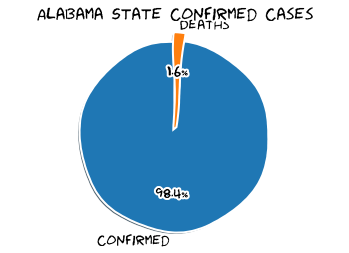

Alabama State Total Population
4887871
Alabama State Confirmed
187706 (3.8402404646112798% of population)
Alabama State Deaths
2911 (1.5508294886684495% of confirmed)



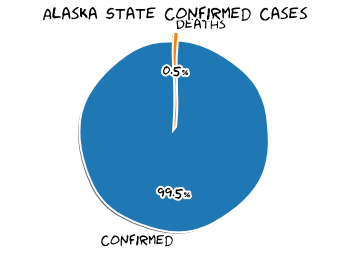

Alaska State Total Population
737438
Alaska State Confirmed
14798 (2.0066771715045872% of population)
Alaska State Deaths
70 (0.47303689687795647% of confirmed)



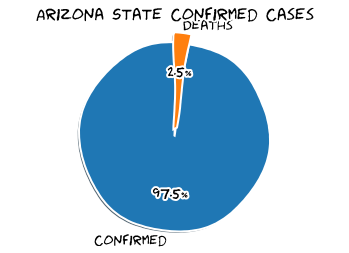

Arizona State Total Population
7171646
Arizona State Confirmed
240122 (3.348213227479438% of population)
Arizona State Deaths
5891 (2.45333622075445% of confirmed)



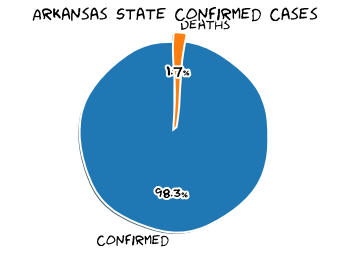

Arkansas State Total Population
3013825
Arkansas State Confirmed
107679 (3.572835184524649% of population)
Arkansas State Deaths
1857 (1.7245702504666647% of confirmed)



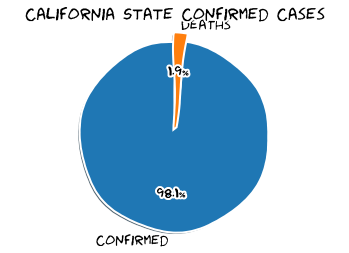

California State Total Population
39557045
California State Confirmed
915899 (2.3153878152425187% of population)
California State Deaths
17485 (1.9090532908104494% of confirmed)



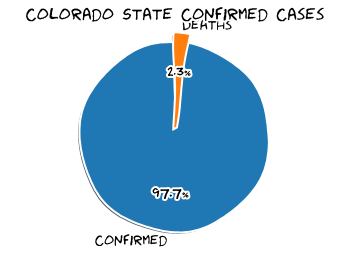

Colorado State Total Population
5695564
Colorado State Confirmed
98710 (1.733103165902446% of population)
Colorado State Deaths
2236 (2.2652213554857665% of confirmed)



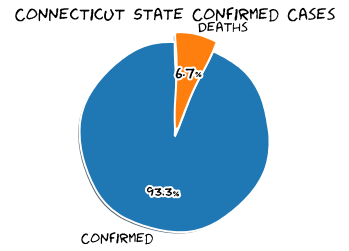

Connecticut State Total Population
3572665
Connecticut State Confirmed
68637 (1.9211708906376614% of population)
Connecticut State Deaths
4595 (6.694639917245801% of confirmed)



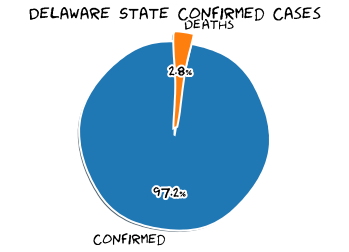

Delaware State Total Population
967171
Delaware State Confirmed
24249 (2.5072091698365644% of population)
Delaware State Deaths
686 (2.828982638459318% of confirmed)



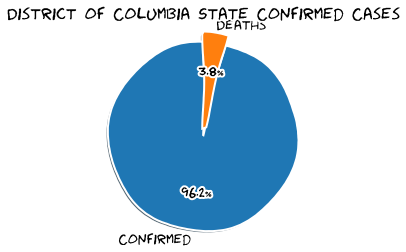

District of Columbia State Total Population
702455
District of Columbia State Confirmed
16906 (2.4067022086824066% of population)
District of Columbia State Deaths
644 (3.8092984739145868% of confirmed)



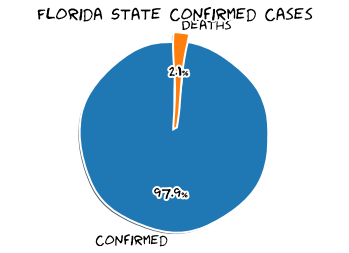

Florida State Total Population
21299325
Florida State Confirmed
786311 (3.6917179300282985% of population)
Florida State Deaths
16505 (2.0990422364687764% of confirmed)



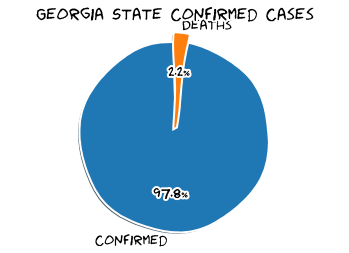

Georgia State Total Population
10519475
Georgia State Confirmed
353372 (3.359217071194142% of population)
Georgia State Deaths
7844 (2.219757083187123% of confirmed)



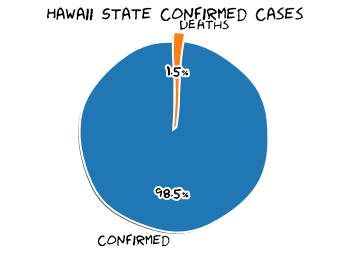

Hawaii State Total Population
1420491
Hawaii State Confirmed
14773 (1.0399925096322327% of population)
Hawaii State Deaths
215 (1.4553577472415895% of confirmed)



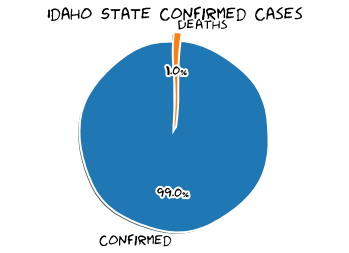

Idaho State Total Population
1754208
Idaho State Confirmed
60923 (3.472963297396888% of population)
Idaho State Deaths
585 (0.9602284851369762% of confirmed)



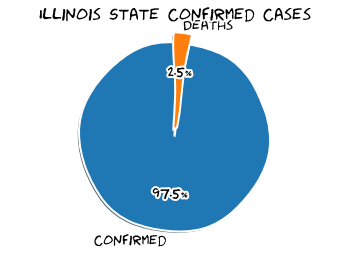

Illinois State Total Population
12741080
Illinois State Confirmed
387687 (3.0428111274711407% of population)
Illinois State Deaths
9838 (2.5376141062248667% of confirmed)



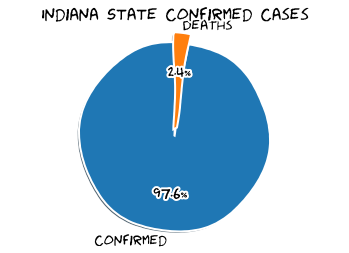

Indiana State Total Population
6691878
Indiana State Confirmed
166564 (2.4890471703160157% of population)
Indiana State Deaths
3958 (2.3762637784875484% of confirmed)



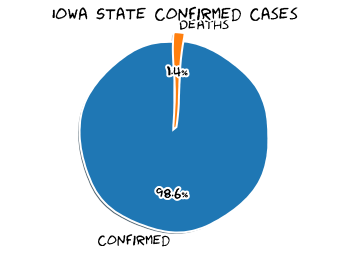

Iowa State Total Population
3156145
Iowa State Confirmed
119279 (3.779262359619092% of population)
Iowa State Deaths
1679 (1.4076241417181565% of confirmed)



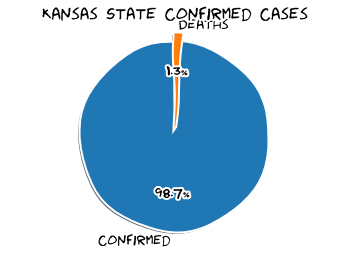

Kansas State Total Population
2911510
Kansas State Confirmed
77896 (2.6754501959464334% of population)
Kansas State Deaths
983 (1.2619389955838554% of confirmed)



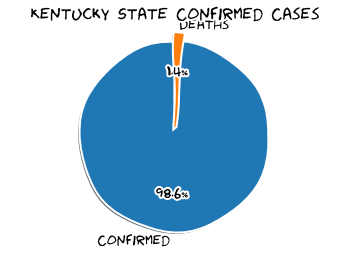

Kentucky State Total Population
4468402
Kentucky State Confirmed
99637 (2.229812805562257% of population)
Kentucky State Deaths
1428 (1.4332025251663538% of confirmed)



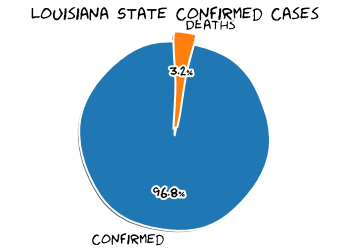

Louisiana State Total Population
4659978
Louisiana State Confirmed
180991 (3.883945374849409% of population)
Louisiana State Deaths
5872 (3.2443602168063608% of confirmed)



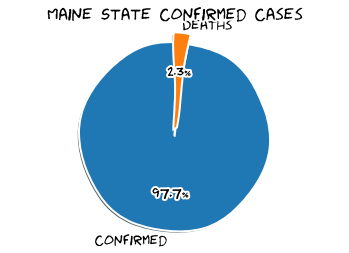

Maine State Total Population
1338404
Maine State Confirmed
6309 (0.47138233298764803% of population)
Maine State Deaths
146 (2.314154382627992% of confirmed)



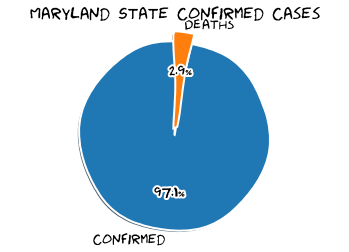

Maryland State Total Population
6042718
Maryland State Confirmed
141741 (2.3456497556232145% of population)
Maryland State Deaths
4095 (2.889072322052194% of confirmed)



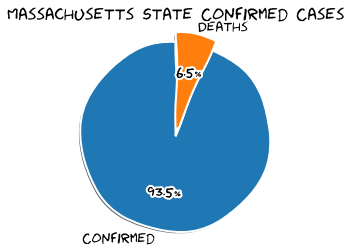

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
153037 (2.217236979381349% of population)
Massachusetts State Deaths
9888 (6.461182589831218% of confirmed)



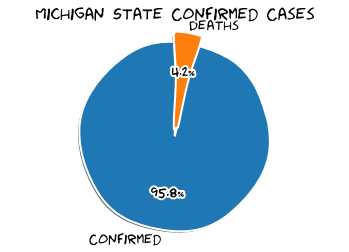

Michigan State Total Population
9995915
Michigan State Confirmed
182344 (1.8241851796458854% of population)
Michigan State Deaths
7585 (4.159720089501163% of confirmed)



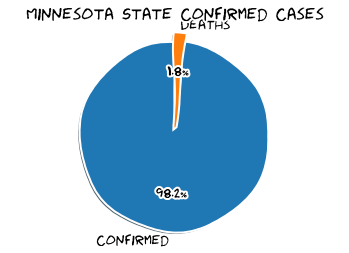

Minnesota State Total Population
5611179
Minnesota State Confirmed
137536 (2.451106977695775% of population)
Minnesota State Deaths
2421 (1.7602664029781292% of confirmed)



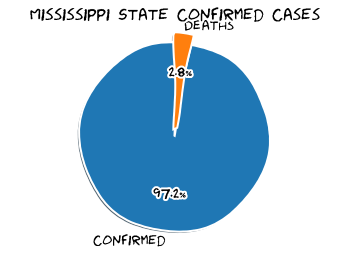

Mississippi State Total Population
2986530
Mississippi State Confirmed
116617 (3.9047657314676227% of population)
Mississippi State Deaths
3283 (2.8151984702058876% of confirmed)



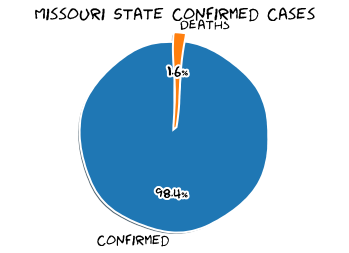

Missouri State Total Population
6126452
Missouri State Confirmed
175130 (2.8585876458348163% of population)
Missouri State Deaths
2855 (1.6302175526751557% of confirmed)



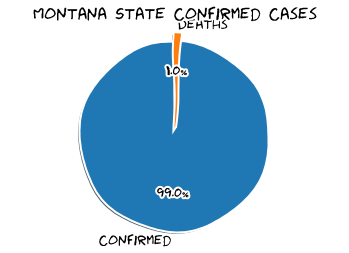

Montana State Total Population
1062305
Montana State Confirmed
29346 (2.7624834675540453% of population)
Montana State Deaths
305 (1.039323928303687% of confirmed)



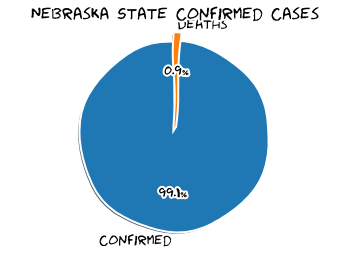

Nebraska State Total Population
1929268
Nebraska State Confirmed
65376 (3.3886427391114147% of population)
Nebraska State Deaths
620 (0.9483602545276554% of confirmed)



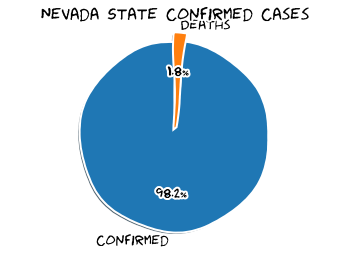

Nevada State Total Population
3034392
Nevada State Confirmed
96908 (3.19365461021516% of population)
Nevada State Deaths
1752 (1.8079002765509555% of confirmed)



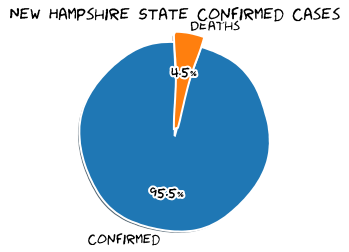

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
10530 (0.7762864755119584% of population)
New Hampshire State Deaths
475 (4.510921177587844% of confirmed)



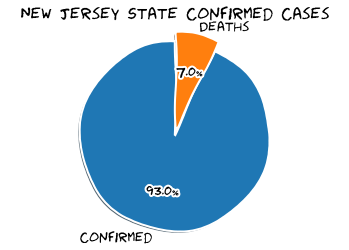

New Jersey State Total Population
8908520
New Jersey State Confirmed
231331 (2.596738852244817% of population)
New Jersey State Deaths
16306 (7.048774267175606% of confirmed)



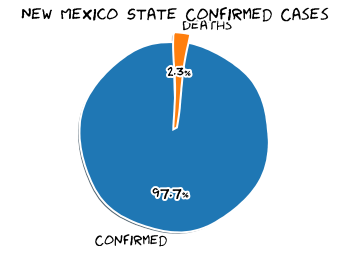

New Mexico State Total Population
2095428
New Mexico State Confirmed
43169 (2.0601519116858227% of population)
New Mexico State Deaths
980 (2.2701475595913734% of confirmed)



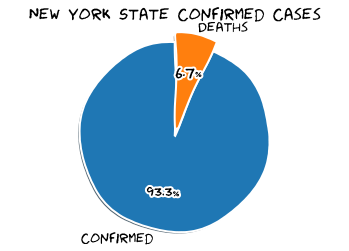

New York State Total Population
19542209
New York State Confirmed
498646 (2.551635795114053% of population)
New York State Deaths
33412 (6.700545076065986% of confirmed)



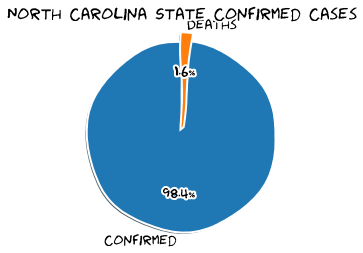

North Carolina State Total Population
10383620
North Carolina State Confirmed
263883 (2.5413391476190386% of population)
North Carolina State Deaths
4211 (1.5957829795780705% of confirmed)



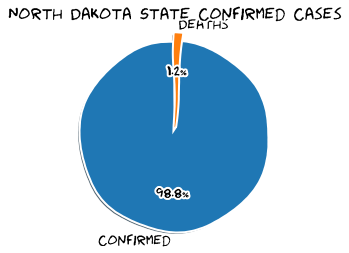

North Dakota State Total Population
760077
North Dakota State Confirmed
39907 (5.25038910531433% of population)
North Dakota State Deaths
488 (1.2228431102312876% of confirmed)



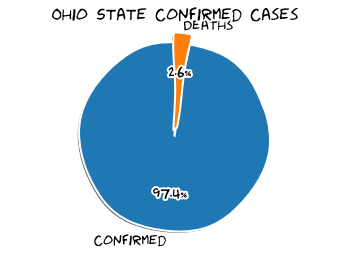

Ohio State Total Population
11689442
Ohio State Confirmed
202740 (1.734385610536414% of population)
Ohio State Deaths
5239 (2.5840978593272173% of confirmed)



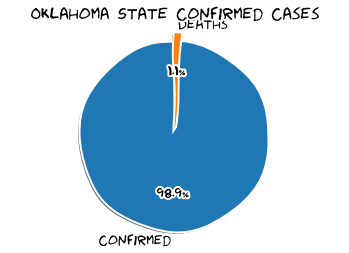

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
118409 (3.002957840814247% of population)
Oklahoma State Deaths
1273 (1.0750871977636836% of confirmed)



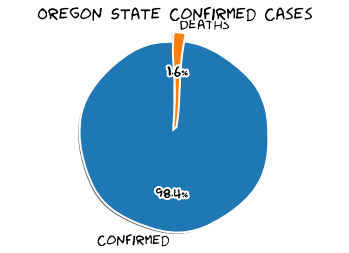

Oregon State Total Population
4190713
Oregon State Confirmed
42808 (1.0214968192763378% of population)
Oregon State Deaths
664 (1.5511119416931416% of confirmed)



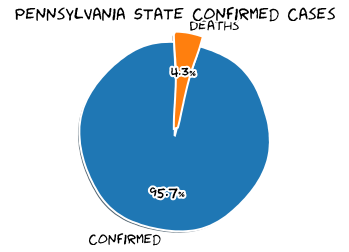

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
203520 (1.5891234990700442% of population)
Pennsylvania State Deaths
8683 (4.2664111635220126% of confirmed)



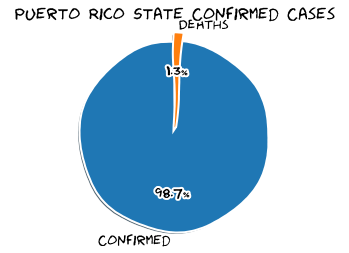

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
63587 (1.9901081419262237% of population)
Puerto Rico State Deaths
813 (1.2785632283328354% of confirmed)



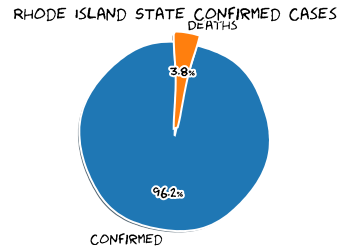

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
31445 (2.974042740337553% of population)
Rhode Island State Deaths
1188 (3.7780251232310382% of confirmed)



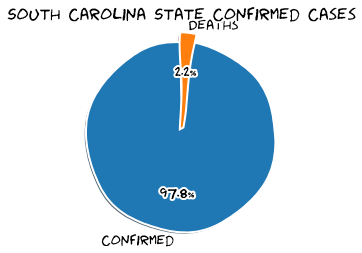

South Carolina State Total Population
5084127
South Carolina State Confirmed
172579 (3.3944667393241748% of population)
South Carolina State Deaths
3842 (2.226226829452019% of confirmed)



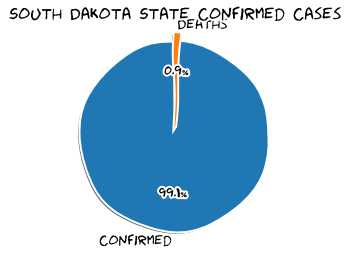

South Dakota State Total Population
882235
South Dakota State Confirmed
40730 (4.616683763396374% of population)
South Dakota State Deaths
375 (0.9206972747360667% of confirmed)



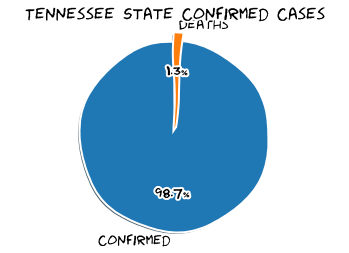

Tennessee State Total Population
6770010
Tennessee State Confirmed
251774 (3.7189605332931563% of population)
Tennessee State Deaths
3207 (1.273761389182362% of confirmed)



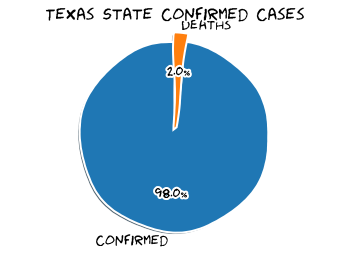

Texas State Total Population
28701845
Texas State Confirmed
904769 (3.1523025784579355% of population)
Texas State Deaths
18061 (1.9962001350620988% of confirmed)



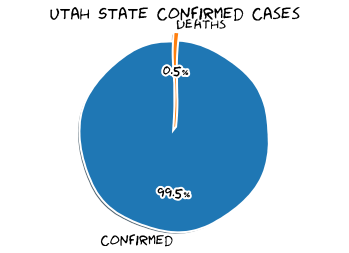

Utah State Total Population
3161105
Utah State Confirmed
107228 (3.392104975949865% of population)
Utah State Deaths
578 (0.5390383108889469% of confirmed)



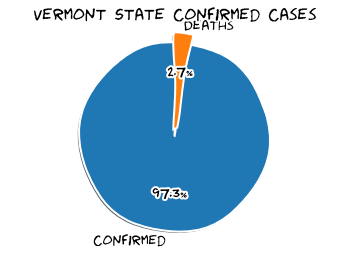

Vermont State Total Population
626299
Vermont State Confirmed
2113 (0.3373787919188758% of population)
Vermont State Deaths
58 (2.744912446758164% of confirmed)



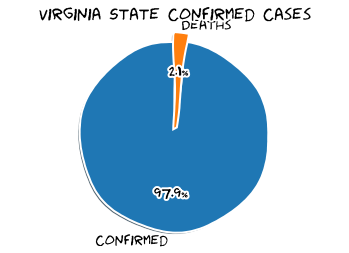

Virginia State Total Population
8517685
Virginia State Confirmed
174786 (2.052036439478567% of population)
Virginia State Deaths
3595 (2.0568008879429702% of confirmed)



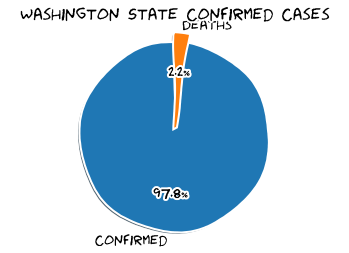

Washington State Total Population
7535591
Washington State Confirmed
104027 (1.380475665412308% of population)
Washington State Deaths
2337 (2.246532150307132% of confirmed)



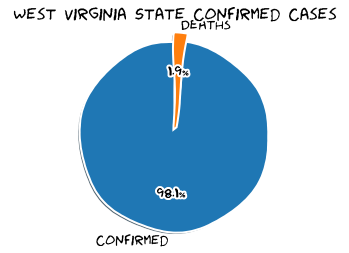

West Virginia State Total Population
1805832
West Virginia State Confirmed
22710 (1.2575920683651636% of population)
West Virginia State Deaths
434 (1.9110523998238662% of confirmed)



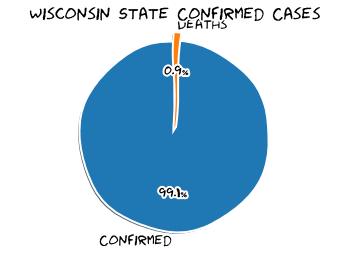

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
206311 (3.5487844986073958% of population)
Wisconsin State Deaths
1852 (0.8976739000828846% of confirmed)



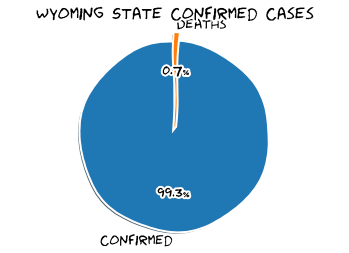

Wyoming State Total Population
577737
Wyoming State Confirmed
11806 (2.0434903771093076% of population)
Wyoming State Deaths
77 (0.6522107403015416% of confirmed)



In [39]:
for i in states:
    state_details(i)

In [40]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 44081789},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 1168824},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-10-28T13:24:47.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 29852184},
 'source': 'https://github.com/mathdroid/covid19'}

In [41]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [42]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,,,,Afghanistan,2020-10-28 04:24:39,33.93911,67.709953,41032,1523,34217,5292,Afghanistan,105.40392666617876,3.7117371807369857
1,,,,Albania,2020-10-28 04:24:39,41.1533,20.1683,19729,487,10808,8434,Albania,685.55841267635,2.4684474631253486
2,,,,Algeria,2020-10-28 04:24:39,28.0339,1.6596,56706,1931,39444,15331,Algeria,129.31505414819893,3.4052833915282332
3,,,,Andorra,2020-10-28 04:24:39,42.5063,1.5218,4410,72,3029,1309,Andorra,5707.62958648806,1.6326530612244898
4,,,,Angola,2020-10-28 04:24:39,-11.2027,17.8739,9871,271,3647,5953,Angola,30.03383286474753,2.745415864654037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,,,,West Bank and Gaza,2020-10-28 04:24:39,31.9522,35.2332,51528,458,44444,6626,West Bank and Gaza,1010.072497518336,0.8888371370905139
3954,,,,Western Sahara,2020-10-28 04:24:39,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3955,,,,Yemen,2020-10-28 04:24:39,15.552727,48.516388,2060,599,1364,97,Yemen,6.906733085745953,29.07766990291262
3956,,,,Zambia,2020-10-28 04:24:39,-13.133897,27.849332,16243,348,15481,414,Zambia,88.35421494698963,2.1424613679738966


In [43]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1603891487000,34.308284,-118.228241,302102,0,7027,295075,Los Angeles,06037,"Los Angeles, California, US",3009.251719,None,None,84006037,USA
1,Florida,US,1603891487000,25.611236,-80.551706,183250,0,3624,179626,Miami-Dade,12086,"Miami-Dade, Florida, US",6744.720163,None,None,84012086,USA
2,Illinois,US,1603891487000,41.841448,-87.816588,178832,0,5439,173393,Cook,17031,"Cook, Illinois, US",3472.308923,None,None,84017031,USA
3,Texas,US,1603891487000,29.858649,-95.393395,159617,0,2785,156832,Harris,48201,"Harris, Texas, US",3386.505280,None,None,84048201,USA
4,Arizona,US,1603891487000,33.348359,-112.491815,155458,0,3557,151901,Maricopa,04013,"Maricopa, Arizona, US",3465.856218,None,None,84004013,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,Arizona,US,1603891487000,NaN,NaN,1,0,1,0,Unassigned,90004,"Unassigned, Arizona, US",NaN,None,None,84090004,USA
3231,Illinois,US,1603891487000,NaN,NaN,1,0,0,1,Out of IL,80017,"Out of IL, Illinois, US",NaN,None,None,84080017,USA
3232,New Mexico,US,1603891487000,34.342745,-104.411784,1,0,0,1,De Baca,35011,"De Baca, New Mexico, US",57.208238,None,None,84035011,USA
3233,New Mexico,US,1603891487000,35.857516,-103.822094,1,0,0,1,Harding,35021,"Harding, New Mexico, US",160.000000,None,None,84035021,USA


In [44]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1603891487000,40.710881,-73.816847,76523,0,7293,69230,Queens,36081,"Queens, New York, US",3395.200585,None,None,84036081,USA
9,New York,US,1603891487000,40.636182,-73.949356,74903,0,7387,67516,Kings,36047,"Kings, New York, US",2926.009306,None,None,84036047,USA
15,New York,US,1603891487000,40.852093,-73.862828,55213,0,4987,50226,Bronx,36005,"Bronx, New York, US",3893.155231,None,None,84036005,USA
18,New York,US,1603891487000,40.740665,-73.589419,49496,0,2208,47288,Nassau,36059,"Nassau, New York, US",3647.661918,None,None,84036059,USA
19,New York,US,1603891487000,40.883201,-72.801217,48829,0,2019,46810,Suffolk,36103,"Suffolk, New York, US",3306.851343,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,New York,US,1603891487000,42.635055,-77.103699,121,0,7,114,Yates,36123,"Yates, New York, US",485.690202,None,None,84036123,USA
2772,New York,US,1603891487000,43.784416,-75.449040,120,0,0,120,Lewis,36049,"Lewis, New York, US",456.343170,None,None,84036049,USA
2810,New York,US,1603891487000,42.588317,-74.443390,110,0,0,110,Schoharie,36095,"Schoharie, New York, US",354.850156,None,None,84036095,USA
2931,New York,US,1603891487000,44.590409,-74.299260,80,0,0,80,Franklin,36033,"Franklin, New York, US",159.929631,None,None,84036033,USA


In [45]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

498646

In [46]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [47]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
17,None,Philippines,1603887876000,12.879721,121.774017,375180,329111,7114,38955.0,None,None,Philippines,342.376606,None,None,608,PHL,PH


In [48]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
